# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


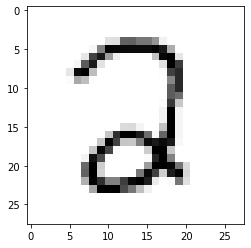

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.23
Training Accuracy: 0.7666, Testing Accuracy: 0.7747



Epoch 10, Loss 0.0624
Training Accuracy: 0.9369, Testing Accuracy: 0.9461



Epoch 20, Loss 0.0436
Training Accuracy: 0.9532, Testing Accuracy: 0.9612



Epoch 30, Loss 0.0365
Training Accuracy: 0.9595, Testing Accuracy: 0.9662



Epoch 40, Loss 0.0325
Training Accuracy: 0.9623, Testing Accuracy: 0.9667



Epoch 50, Loss 0.0299
Training Accuracy: 0.9653, Testing Accuracy: 0.9682



Epoch 60, Loss 0.0279
Training Accuracy: 0.9677, Testing Accuracy: 0.9693



Epoch 70, Loss 0.0264
Training Accuracy: 0.9695, Testing Accuracy: 0.9698



Epoch 80, Loss 0.0251
Training Accuracy: 0.9706, Testing Accuracy: 0.9698



Epoch 90, Loss 0.0241
Training Accuracy: 0.9718, Testing Accuracy: 0.9708



Epoch 100, Loss 0.0231
Training Accuracy: 0.9733, Testing Accuracy: 0.9713



Epoch 110, Loss 0.0223
Training Accuracy: 0.9738, Testing Accuracy: 0.9713



Epoch 120, Loss 0.0215
Training Accuracy: 0.9746, Testing Accuracy: 0.9713



Epoch 130, Loss 0.0209
Training Accuracy: 0.9761, Testing Accuracy: 0.9713



Epoch 140, Loss 0.0202
Training Accuracy: 0.9770, Testing Accuracy: 0.9723



Epoch 150, Loss 0.0196
Training Accuracy: 0.9775, Testing Accuracy: 0.9728



Epoch 160, Loss 0.0191
Training Accuracy: 0.9783, Testing Accuracy: 0.9738



Epoch 170, Loss 0.0186
Training Accuracy: 0.9791, Testing Accuracy: 0.9748



Epoch 180, Loss 0.0181
Training Accuracy: 0.9797, Testing Accuracy: 0.9748



Epoch 190, Loss 0.0176
Training Accuracy: 0.9805, Testing Accuracy: 0.9753



Epoch 200, Loss 0.0172
Training Accuracy: 0.9810, Testing Accuracy: 0.9763



Epoch 210, Loss 0.0167
Training Accuracy: 0.9813, Testing Accuracy: 0.9763



Epoch 220, Loss 0.0163
Training Accuracy: 0.9820, Testing Accuracy: 0.9768



Epoch 230, Loss 0.0159
Training Accuracy: 0.9822, Testing Accuracy: 0.9768



Epoch 240, Loss 0.0156
Training Accuracy: 0.9827, Testing Accuracy: 0.9768



0.00523070268815969

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2274
Training Accuracy: 0.7382, Testing Accuracy: 0.7404



Epoch 10, Loss 0.101
Training Accuracy: 0.9121, Testing Accuracy: 0.9183



Epoch 20, Loss 0.078
Training Accuracy: 0.9295, Testing Accuracy: 0.9405



Epoch 30, Loss 0.0674
Training Accuracy: 0.9379, Testing Accuracy: 0.9476



Epoch 40, Loss 0.0611
Training Accuracy: 0.9418, Testing Accuracy: 0.9526



Epoch 50, Loss 0.0567
Training Accuracy: 0.9449, Testing Accuracy: 0.9546



Epoch 60, Loss 0.0535
Training Accuracy: 0.9479, Testing Accuracy: 0.9582



Epoch 70, Loss 0.0511
Training Accuracy: 0.9490, Testing Accuracy: 0.9587



Epoch 80, Loss 0.0491
Training Accuracy: 0.9508, Testing Accuracy: 0.9587



Epoch 90, Loss 0.0474
Training Accuracy: 0.9519, Testing Accuracy: 0.9607



Epoch 100, Loss 0.046
Training Accuracy: 0.9527, Testing Accuracy: 0.9627



Epoch 110, Loss 0.0448
Training Accuracy: 0.9533, Testing Accuracy: 0.9627



Epoch 120, Loss 0.0438
Training Accuracy: 0.9543, Testing Accuracy: 0.9637



Epoch 130, Loss 0.0429
Training Accuracy: 0.9552, Testing Accuracy: 0.9632



Epoch 140, Loss 0.0421
Training Accuracy: 0.9558, Testing Accuracy: 0.9642



Epoch 150, Loss 0.0413
Training Accuracy: 0.9560, Testing Accuracy: 0.9642



Epoch 160, Loss 0.0407
Training Accuracy: 0.9569, Testing Accuracy: 0.9642



Epoch 170, Loss 0.0401
Training Accuracy: 0.9574, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0395
Training Accuracy: 0.9581, Testing Accuracy: 0.9652



Epoch 190, Loss 0.039
Training Accuracy: 0.9591, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0385
Training Accuracy: 0.9597, Testing Accuracy: 0.9657



Epoch 210, Loss 0.0381
Training Accuracy: 0.9599, Testing Accuracy: 0.9657



Epoch 220, Loss 0.0377
Training Accuracy: 0.9602, Testing Accuracy: 0.9657



Epoch 230, Loss 0.0373
Training Accuracy: 0.9604, Testing Accuracy: 0.9657



Epoch 240, Loss 0.0369
Training Accuracy: 0.9606, Testing Accuracy: 0.9657



0.03682685086066249

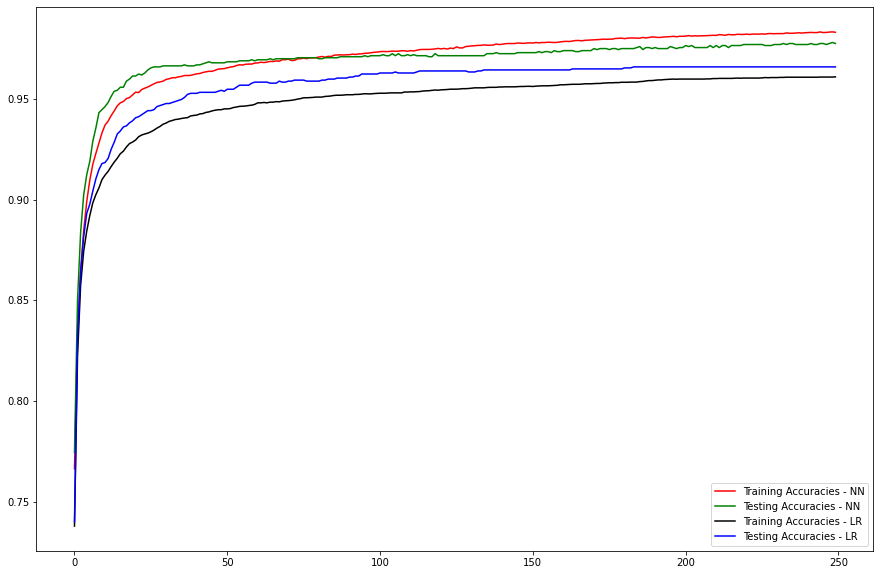

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

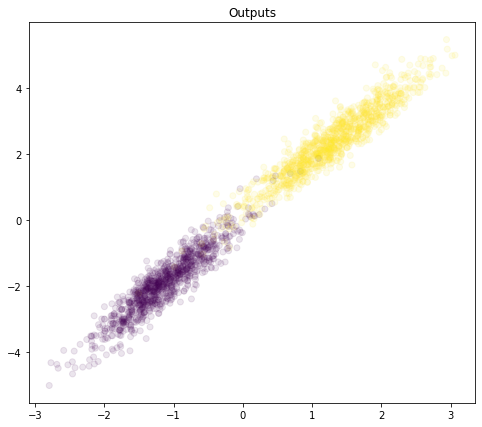

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

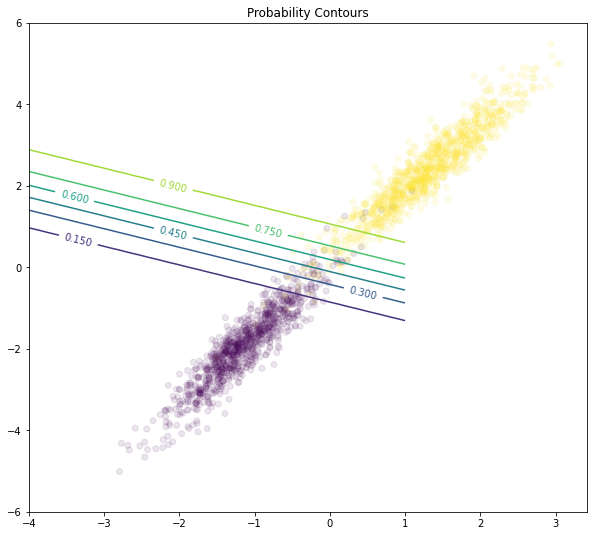

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );